In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('census_data.csv')

# 1. Quantas pessoas de cada raça estão representadas neste dataset?
race_count = df['race'].value_counts()

# 2. Qual é a média de idade dos homens?
average_age_men = df[df['sex'] == 'Male']['age'].mean()

# 3. Qual é a porcentagem de pessoas que têm um diploma de bacharel?
percentage_bachelors = (df['education'] == 'Bachelors').mean() * 100

# 4. Qual é a porcentagem de pessoas com educação superior que ganham mais de 50 mil?
higher_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
percentage_higher_education_rich = (df[higher_education & (df['salary'] == '>50K')].shape[0] / df[higher_education].shape[0]) * 100

# 5. Qual é a porcentagem de pessoas sem educação superior que ganham mais de 50 mil?
lower_education = ~higher_education
percentage_lower_education_rich = (df[lower_education & (df['salary'] == '>50K')].shape[0] / df[lower_education].shape[0]) * 100

# 6. Qual é o número mínimo de horas que uma pessoa trabalha por semana?
min_work_hours = df['hours-per-week'].min()

# 7. Qual é a porcentagem das pessoas que trabalham o número mínimo de horas por semana e que têm um salário superior a 50 mil?
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage_min_workers = (num_min_workers[num_min_workers['salary'] == '>50K'].shape[0] / num_min_workers.shape[0]) * 100

# 8. Qual país tem a maior porcentagem de pessoas que ganham > 50 mil e qual é essa porcentagem?
country_salary = df[df['salary'] == '>50K']['native-country'].value_counts()
country_count = df['native-country'].value_counts()
highest_earning_country = (country_salary / country_count * 100).idxmax()
highest_earning_country_percentage = (country_salary / country_count * 100).max()

# 9. Identifique a ocupação mais popular entre aqueles que ganham > 50 mil na Índia.
top_IN_occupation = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts().idxmax()

#### Exibindo os resultados

In [3]:
print("Contagem de pessoas por raça:\n", race_count)
print("Média de idade dos homens:", average_age_men)
print("Porcentagem de pessoas com diploma de bacharel:", percentage_bachelors)
print("Porcentagem de pessoas com educação superior que ganham >50K:", percentage_higher_education_rich)
print("Porcentagem de pessoas sem educação superior que ganham >50K:", percentage_lower_education_rich)
print("Número mínimo de horas trabalhadas por semana:", min_work_hours)
print("Porcentagem de pessoas que trabalham o mínimo de horas e ganham >50K:", rich_percentage_min_workers)
print("País com maior porcentagem de pessoas que ganham >50K:", highest_earning_country)
print("Porcentagem de pessoas que ganham >50K nesse país:", highest_earning_country_percentage)
print("Ocupação mais popular entre aqueles que ganham >50K na Índia:", top_IN_occupation)

Contagem de pessoas por raça:
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
Média de idade dos homens: 39.43354749885268
Porcentagem de pessoas com diploma de bacharel: 16.44605509658794
Porcentagem de pessoas com educação superior que ganham >50K: 46.535843011613935
Porcentagem de pessoas sem educação superior que ganham >50K: 17.3713601914639
Número mínimo de horas trabalhadas por semana: 1
Porcentagem de pessoas que trabalham o mínimo de horas e ganham >50K: 10.0
País com maior porcentagem de pessoas que ganham >50K: Iran
Porcentagem de pessoas que ganham >50K nesse país: 41.86046511627907
Ocupação mais popular entre aqueles que ganham >50K na Índia: Prof-specialty


#### Exibindo os resultados gráficos

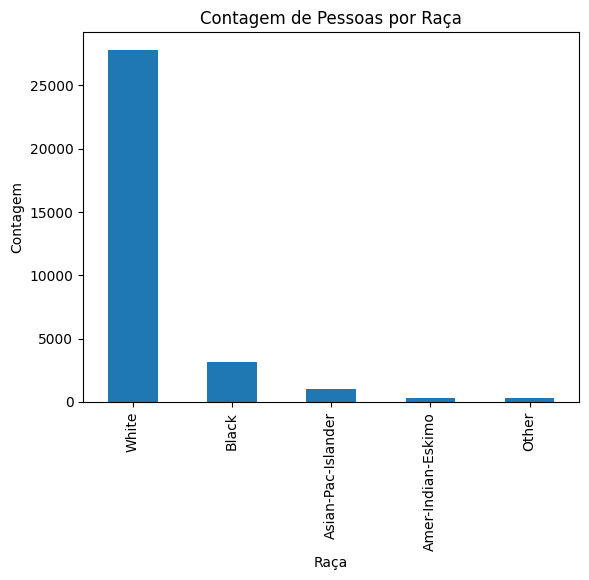

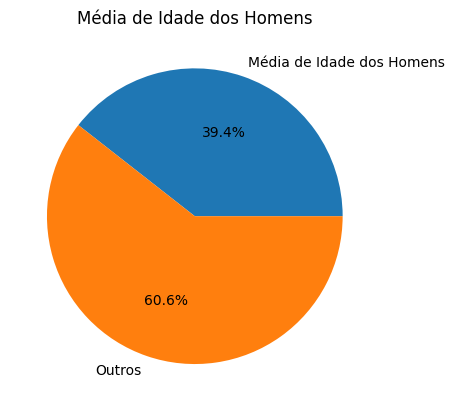

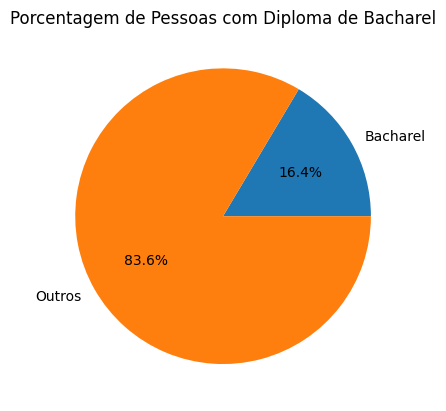

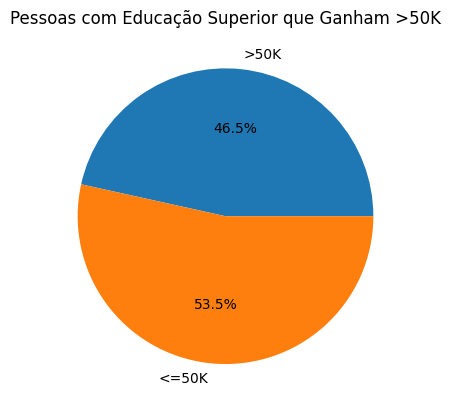

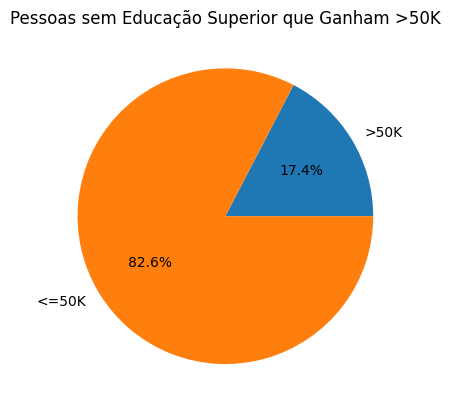

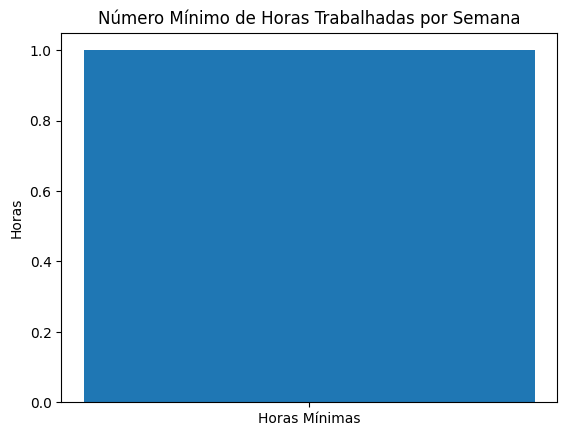

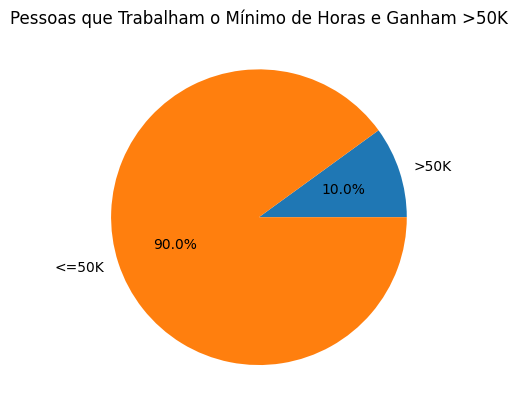

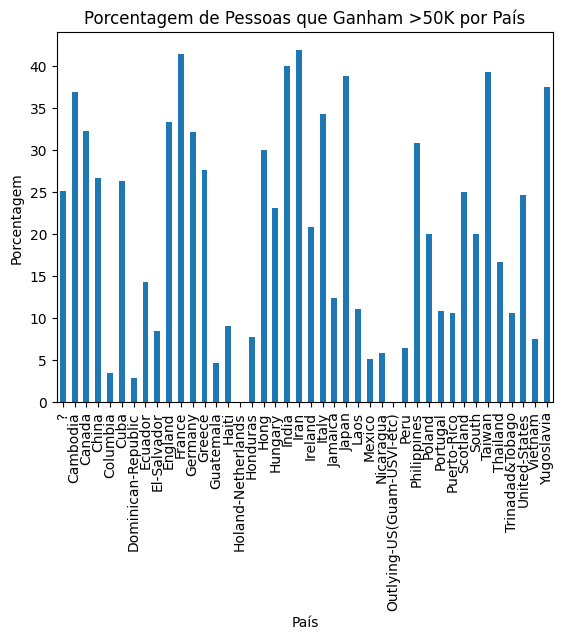

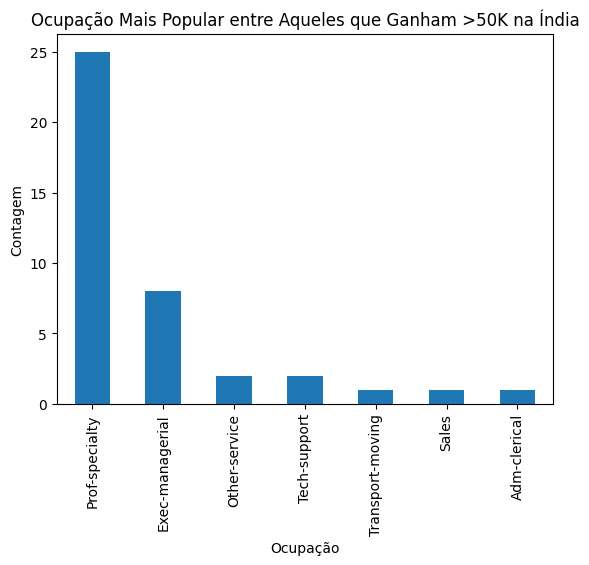

In [5]:
# 1. Quantas pessoas de cada raça estão representadas neste dataset?
race_count = df['race'].value_counts()

# Gráfico de barras para a contagem de pessoas por raça
race_count.plot(kind='bar', title='Contagem de Pessoas por Raça')
plt.xlabel('Raça')
plt.ylabel('Contagem')
plt.show()

# 2. Qual é a média de idade dos homens?
average_age_men = df[df['sex'] == 'Male']['age'].mean()

# Gráfico de pizza para a média de idade dos homens
plt.pie([average_age_men, 100-average_age_men], labels=['Média de Idade dos Homens', 'Outros'], autopct='%1.1f%%')
plt.title('Média de Idade dos Homens')
plt.show()

# 3. Qual é a porcentagem de pessoas que têm um diploma de bacharel?
percentage_bachelors = (df['education'] == 'Bachelors').mean() * 100

# Gráfico de pizza para a porcentagem de pessoas com diploma de bacharel
plt.pie([percentage_bachelors, 100-percentage_bachelors], labels=['Bacharel', 'Outros'], autopct='%1.1f%%')
plt.title('Porcentagem de Pessoas com Diploma de Bacharel')
plt.show()

# 4. Qual é a porcentagem de pessoas com educação superior que ganham mais de 50 mil?
higher_education = df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])
percentage_higher_education_rich = (df[higher_education & (df['salary'] == '>50K')].shape[0] / df[higher_education].shape[0]) * 100

# Gráfico de pizza para a porcentagem de pessoas com educação superior que ganham >50K
plt.pie([percentage_higher_education_rich, 100-percentage_higher_education_rich], labels=['>50K', '<=50K'], autopct='%1.1f%%')
plt.title('Pessoas com Educação Superior que Ganham >50K')
plt.show()

# 5. Qual é a porcentagem de pessoas sem educação superior que ganham mais de 50 mil?
lower_education = ~higher_education
percentage_lower_education_rich = (df[lower_education & (df['salary'] == '>50K')].shape[0] / df[lower_education].shape[0]) * 100

# Gráfico de pizza para a porcentagem de pessoas sem educação superior que ganham >50K
plt.pie([percentage_lower_education_rich, 100-percentage_lower_education_rich], labels=['>50K', '<=50K'], autopct='%1.1f%%')
plt.title('Pessoas sem Educação Superior que Ganham >50K')
plt.show()

# 6. Qual é o número mínimo de horas que uma pessoa trabalha por semana?
min_work_hours = df['hours-per-week'].min()

# Gráfico de barras para o número mínimo de horas trabalhadas por semana
plt.bar(['Horas Mínimas'], [min_work_hours])
plt.title('Número Mínimo de Horas Trabalhadas por Semana')
plt.ylabel('Horas')
plt.show()

# 7. Qual é a porcentagem das pessoas que trabalham o número mínimo de horas por semana e que têm um salário superior a 50 mil?
num_min_workers = df[df['hours-per-week'] == min_work_hours]
rich_percentage_min_workers = (num_min_workers[num_min_workers['salary'] == '>50K'].shape[0] / num_min_workers.shape[0]) * 100

# Gráfico de pizza para a porcentagem de pessoas que trabalham o mínimo de horas e ganham >50K
plt.pie([rich_percentage_min_workers, 100-rich_percentage_min_workers], labels=['>50K', '<=50K'], autopct='%1.1f%%')
plt.title('Pessoas que Trabalham o Mínimo de Horas e Ganham >50K')
plt.show()

# 8. Qual país tem a maior porcentagem de pessoas que ganham > 50 mil e qual é essa porcentagem?
country_salary = df[df['salary'] == '>50K']['native-country'].value_counts()
country_count = df['native-country'].value_counts()
highest_earning_country = (country_salary / country_count * 100).idxmax()
highest_earning_country_percentage = (country_salary / country_count * 100).max()

# Gráfico de barras para a porcentagem de pessoas que ganham >50K por país
(country_salary / country_count * 100).plot(kind='bar', title='Porcentagem de Pessoas que Ganham >50K por País')
plt.xlabel('País')
plt.ylabel('Porcentagem')
plt.show()

# 9. Identifique a ocupação mais popular entre aqueles que ganham > 50 mil na Índia.
top_IN_occupation = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts().idxmax()

# Gráfico de barras para a ocupação mais popular entre aqueles que ganham >50K na Índia
df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]['occupation'].value_counts().plot(kind='bar', title='Ocupação Mais Popular entre Aqueles que Ganham >50K na Índia')
plt.xlabel('Ocupação')
plt.ylabel('Contagem')
plt.show()
